In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [14]:
def generate_rainfall(num_obs):
    rain_fall = []
    for i in range(num_obs):
        rain = random.randint(700, 1000)
        rain_fall.append(rain)
        
    return rain_fall

def generate_soil(num_obs):
    soil_qual = []
    for i in range(num_obs):
        qual = random.randint(50, 100)
        soil_qual.append(qual)
    return soil_qual
        
def generate_cost(num_obs):
    trans_cost = []
    for i in range(num_obs):
        cost = random.randint(20, 500)
        trans_cost.append(cost)
        
    return trans_cost

def generate_cla(num_obs):
    water_cla = []
    for i in range(num_obs):
        cla = random.randint(80, 200)
        water_cla.append(cla)
        
    return water_cla

def generate_profit(num_obs):
    profits = []
    for i in range(num_obs):
        profit = random.choice(['Yes', 'No'])
        profits.append(profit)
        
    return profits

In [15]:
def generate_data(num_obs):
    data = {'Avg_rainfall':generate_rainfall(num_obs),
           'Soil_Quality':generate_soil(num_obs),
           'Transportation_cost':generate_cost(num_obs),
           'Water_Clarity':generate_cla(num_obs),
           'Profitable':generate_profit(num_obs)}
    
    lobster = pd.DataFrame(data)
    
    return lobster

In [47]:
lobster = generate_data(5000)
lobster

,Avg_rainfall,Soil_Quality,Transportation_cost,Water_Clarity,Profitable
0,966,86,46,161,No
1,934,84,430,111,Yes
2,859,80,109,180,No
3,774,55,48,106,No
4,904,89,380,136,No
...,...,...,...,...,...
4995,971,61,253,158,Yes
4996,966,50,347,189,No
4997,747,92,238,176,No
4998,818,50,446,109,No


In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [49]:
lobster.shape

(5000, 5)

In [50]:
lobster.describe()

,Avg_rainfall,Soil_Quality,Transportation_cost,Water_Clarity
count,5000.000000,5000.000000,5000.00000,5000.000000
mean,849.713200,74.961800,259.11340,140.194600
std,87.206263,14.688808,140.02934,34.867215
min,700.000000,50.000000,20.00000,80.000000
25%,774.000000,62.000000,137.00000,109.000000
50%,848.000000,75.000000,259.00000,141.000000
75%,926.000000,88.000000,378.00000,170.000000
max,1000.000000,100.000000,500.00000,200.000000


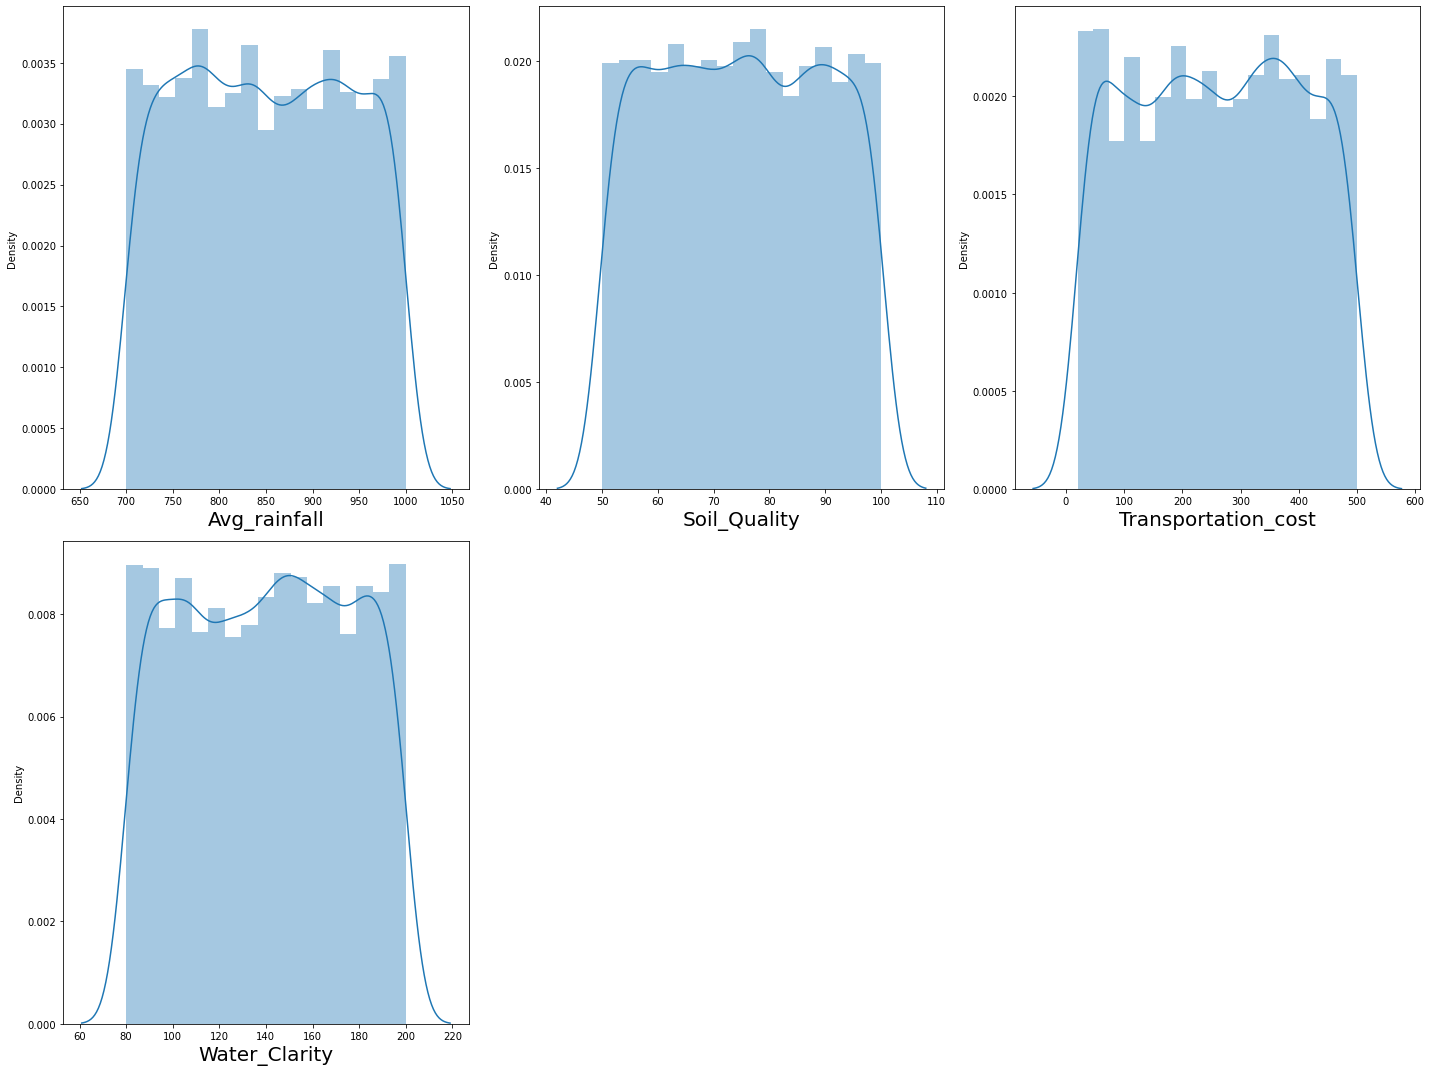

In [51]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in lobster[['Avg_rainfall', 'Soil_Quality', 'Transportation_cost', 'Water_Clarity']]:
    if plotnumber <5:
        ax = plt.subplot(2,3, plotnumber)
        sns.distplot(lobster[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [52]:
x = lobster.drop(columns=['Profitable'], axis=1)
y = lobster['Profitable']

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)
clf = RandomForestClassifier()
params = {'n_estimators':[2],
         'criterion':['entropy', 'gini'],
         'max_depth':[10,11,12,13,14,15,16,17,18,19,20],
         'min_samples_split':[5,6,7,8,9,10],
         'min_samples_leaf':[3,4,5,6]}

grid = GridSearchCV(clf, param_grid=params)

In [54]:
grid.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [2]})

In [55]:
print('Best Params -> ', grid.best_params_)

Best Params ->  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 9, 'n_estimators': 2}


In [56]:
clf = grid.best_estimator_
clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=6,
                       min_samples_split=9, n_estimators=2)

In [57]:
y_pred = clf.predict(X_test)
rf_confmat = confusion_matrix(Y_test, y_pred)
print('\n Confusion Matrxi \n =', rf_confmat)
print('\n Accuracy Score \n =', accuracy_score(Y_test, y_pred))


 Confusion Matrxi 
 = [[410 334]
 [413 343]]

 Accuracy Score 
 = 0.502
